In [21]:
import pandas as pd
import numpy as np

df_match_data = pd.read_excel('..\\data\\match_data_WIDE.xlsx', header=0)
df_match_team_data = pd.read_excel('..\\data\\match_team_data_WIDE.xlsx', header=0)
df_referee_data = pd.read_excel('..\\data\\referee_data_LONG.xlsx', header=0)
dict_team = pd.read_excel('..\\data\\team_dict.xlsx', header=0)

In [ ]:
# 裁判及红黄牌明细数据
df_ref_match = df_referee_data[df_referee_data['ref_role'] == 'Referee'][['match_id', 'ref_name', 'ref_country']]
df_ref_cards = df_ref_match.merge(df_match_team_data[['match_id', 'team_id', 'yellow_cards', 'red_cards']], on='match_id', how='right')
df_ref_cards


,match_id,ref_name,ref_country,team_id,yellow_cards,red_cards
0,2036161,Clément Turpin,France,117,1,1
1,2036161,Clément Turpin,France,47,2,0
2,2036162,Slavko Vinčić,Slovenia,128,3,0
3,2036162,Slavko Vinčić,Slovenia,57,2,0
4,2036163,Michael Oliver,England,122,1,0
...,...,...,...,...,...,...
97,2036209,Slavko Vinčić,Slovenia,43,2,0
98,2036210,Felix Zwayer,Germany,39,3,0
99,2036210,Felix Zwayer,Germany,95,3,0
100,2036211,François Letexier,France,122,1,0


In [ ]:
# 各场比赛裁判红牌数据
df_ref_cards_match = df_ref_cards.groupby(['ref_name', 'match_id'], as_index=False)[['yellow_cards', 'red_cards']].sum()
df_ref_cards_match
# df_ref_cards_avg = df_ref_cards_match.groupby('ref_name', as_index=False)[['yellow_cards', 'red_cards']].mean().round(2)
# df_ref_cards_avg

,ref_name,match_id,yellow_cards,red_cards
0,Anthony Taylor,2036180,1,0
1,Anthony Taylor,2036193,2,0
2,Anthony Taylor,2036205,15,1
3,Artur Soares Dias,2036167,1,0
4,Artur Soares Dias,2036178,4,0
5,Artur Soares Dias,2036204,4,0
6,Clément Turpin,2036161,3,1
7,Clément Turpin,2036189,5,0
8,Clément Turpin,2036207,6,1
9,Daniel Siebert,2036184,9,0


,ref_name,match_id,yellow_cards,red_cards
0,Anthony Taylor,2036180,1,0
1,Anthony Taylor,2036193,2,0
2,Anthony Taylor,2036205,15,1
3,Artur Soares Dias,2036167,1,0
4,Artur Soares Dias,2036178,4,0
5,Artur Soares Dias,2036204,4,0
6,Clément Turpin,2036161,3,1
7,Clément Turpin,2036189,5,0
8,Clément Turpin,2036207,6,1
9,Daniel Siebert,2036184,9,0


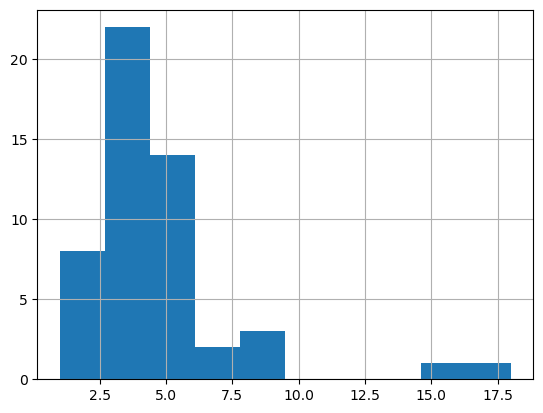

In [ ]:
# 各比赛黄牌数直方图
df_ref_cards_match['yellow_cards'].hist()
df_ref_cards_match

In [ ]:
# 各比赛黄牌数排除异常值
df_ref_yellow_cards_match = df_ref_cards_match.drop('red_cards', axis=1)
df_ref_yellow_cards_match_drop = df_ref_yellow_cards_match.drop(df_ref_yellow_cards_match[df_ref_yellow_cards_match.match_id.isin([2036195, 2036205])].index, inplace=False)
df_ref_yellow_cards_match_drop

,ref_name,match_id,yellow_cards
0,Anthony Taylor,2036180,1
1,Anthony Taylor,2036193,2
3,Artur Soares Dias,2036167,1
4,Artur Soares Dias,2036178,4
5,Artur Soares Dias,2036204,4
6,Clément Turpin,2036161,3
7,Clément Turpin,2036189,5
8,Clément Turpin,2036207,6
9,Daniel Siebert,2036184,9
10,Daniel Siebert,2036194,5


In [ ]:
# 黄牌数简单描述
df_ref_yellow_cards_match_drop.describe().round(2)

,match_id,yellow_cards
count,49.00,49.00
mean,2036185.43,4.22
std,14.85,1.96
min,2036161.00,1.00
25%,2036173.00,3.00
50%,2036185.00,4.00
75%,2036198.00,5.00
max,2036211.00,9.00


In [ ]:
# 黄牌数数据分析
df_ref_yellow_cards_mean = df_ref_yellow_cards_match_drop.groupby('ref_name', as_index=False)['yellow_cards'].mean().sort_values(by='yellow_cards', ascending=False).round(2)
df_ref_yellow_cards_mean

df_ref_match_count = df_ref_match.groupby('ref_name', as_index=False)['match_id'].count().sort_values(by='match_id', ascending=False)
df_ref_match_count.columns = ['ref_name', 'match_count']
df_ref_match_count

df_ref_yellow_cards_result = df_ref_yellow_cards_mean.merge(df_ref_match_count, on='ref_name', how='left')
df_ref_yellow_cards_result

,ref_name,yellow_cards,match_count
0,Jesús Gil Manzano,7.00,1
1,Daniel Siebert,7.00,2
2,Danny Makkelie,7.00,2
3,Umut Meler,6.33,3
4,István Kovács,6.00,2
5,Felix Zwayer,4.75,4
6,Clément Turpin,4.67,3
7,Slavko Vinčić,4.67,3
8,Facundo Tello,4.50,2
9,Daniele Orsato,4.25,4


In [ ]:
# 各阶段黄牌数
df_yellow_cards_phase = df_ref_cards_match[['match_id', 'yellow_cards']].merge(df_match_data[['match_id', 'match_round_name']], on='match_id', how='left')
df_yellow_cards_phase['phase'] = df_yellow_cards_phase.apply(lambda x: 'Group' if x['match_round_name'] == 'Group stage' else 'Knockout', axis=1)
df_yellow_cards_phase
df_yellow_cards_phase.groupby('phase', as_index=False)['yellow_cards'].mean().round(2)


,phase,yellow_cards
0,Group,4.47
1,Knockout,5.27


In [29]:
# 球队跑动距离分析
df_dist_cover = df_match_team_data[['match_id', 'team_id', 'distance_covered']]
df_dist_cover = df_dist_cover.groupby('team_id', as_index=False)['distance_covered'].mean().sort_values(by='distance_covered', ascending=False).round(2).merge(dict_team, left_on='team_id', right_on='team_id', how='left')
df_dist_cover_output = df_dist_cover[['team_name', 'distance_covered']]
df_dist_cover_output

,team_name,distance_covered
0,Portugal,127.15
1,Slovakia,124.76
2,Slovenia,122.73
3,Germany,122.12
4,England,120.87
5,Switzerland,119.57
6,Spain,118.95
7,Croatia,118.90
8,Czechia,117.15
9,Italy,116.47


In [ ]:
# 跑动距离和胜负关系
df_team_data_dist = df_match_team_data[['match_id', 'team_id', 'distance_covered']].merge(dict_team, left_on='team_id', right_on='team_id', how='left')
df_team_data_dist

# 找出每场比赛跑动距离更长的队伍
df_dist_cover_longer = df_team_data_dist.loc[df_team_data_dist.groupby('match_id')['distance_covered'].idxmax()]
df_dist_cover_longer

# 各场胜者
df_match_result = df_match_data[['match_id', 'match_winner_name']]
df_match_result

# 拼接
df_dist_cover_longer_result = df_dist_cover_longer.merge(df_match_result, on='match_id', how='left')
df_dist_cover_longer_result

# 跑动距离和胜负关系
# 0:输 1:胜 2:平
df_dist_cover_longer_result['result'] = df_dist_cover_longer_result.apply(lambda x: '2' if x['match_winner_name'] == 'DRAW' else '1' if x['team_name'] == x['match_winner_name'] else '0', axis=1)
df_dist_cover_longer_result['result'].value_counts()

result
1    19
0    18
2    14
Name: count, dtype: int64